# In the land of intraday heart rate analysis
- Used the fitbit API to collect personal data <br>
<br> Analysis inspired by: https://medium.com/@shsu14/what-i-learned-from-analyzing-my-fitbit-data-61125d85af40

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

%matplotlib inline

In [2]:
# define function to read files and add date components
def read_files_from_path(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        df['date'] = c[-12:-4]
        year, month, day = int(c[-12:-8]), int(c[-8:-6]), int(c[-6:-4])
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['DOW'] = datetime.date(year, month, day).strftime('%A')
        df['DOW'] = pd.Categorical(df['DOW'],
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
        dflist.append(df)
    frame = pd.concat(dflist)
    return frame

In [3]:
df = read_files_from_path('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit-master/downloads/heart/')

In [4]:
df.tail()

,Time,Heart Rate,date,year,month,day,DOW
36419,23:58:47,58,20180420,2018,4,20,Friday
36420,23:58:49,57,20180420,2018,4,20,Friday
36421,23:58:51,57,20180420,2018,4,20,Friday
36422,23:58:54,57,20180420,2018,4,20,Friday
36423,23:58:57,57,20180420,2018,4,20,Friday


In [5]:
df.head()

,Time,Heart Rate,date,year,month,day,DOW
0,00:00:00,50,20180417,2018,4,17,Tuesday
1,00:00:03,56,20180417,2018,4,17,Tuesday
2,00:00:04,56,20180417,2018,4,17,Tuesday
3,00:00:07,56,20180417,2018,4,17,Tuesday
4,00:00:10,56,20180417,2018,4,17,Tuesday


In [6]:
# split time column into hr:min and hr columns
df['hr:min'] = df['Time'].str.slice(start=0, stop=5)
df['hr'] = df['Time'].str.slice(start=0, stop=2)

In [7]:
df.head()

,Time,Heart Rate,date,year,month,day,DOW,hr:min,hr
0,00:00:00,50,20180417,2018,4,17,Tuesday,00:00,00
1,00:00:03,56,20180417,2018,4,17,Tuesday,00:00,00
2,00:00:04,56,20180417,2018,4,17,Tuesday,00:00,00
3,00:00:07,56,20180417,2018,4,17,Tuesday,00:00,00
4,00:00:10,56,20180417,2018,4,17,Tuesday,00:00,00


In [8]:
# define function to give min, mean, median and max of data
def summary_stats(stats_df, col_name):
    stats_df = pd.DataFrame({
        'Min' : str(np.min(stats_df[col_name])),
        'Mean' : str(round(np.mean(stats_df[col_name]), 2)),
        'Median' : str(np.median(stats_df[col_name])),
        'Max' : str(np.max(stats_df[col_name]))
    }, index=[0])
    return stats_df

In [9]:
summary_stats(df, 'Heart Rate')

,Max,Mean,Median,Min
0,167,65.98,60.0,41


/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Counts')

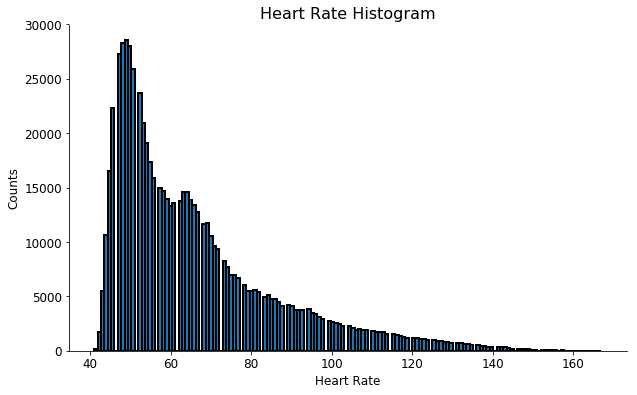

In [10]:
HR = df['Heart Rate']
plt.figure(figsize=(10, 6))
plt.hist(HR, linewidth=2, bins=150, edgecolor='black')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Heart Rate Histogram', fontsize=16)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Counts', fontsize=12)

In [11]:
hourly_df = df.groupby(by='hr').mean()
meanHR = hourly_df['Heart Rate']

In [12]:
DOW_df = df.groupby(by='DOW').mean()
meanDOW = DOW_df['Heart Rate']

In [13]:
meanDOW_np = meanDOW.tolist()

Text(0.5,0,'Day of the Week')

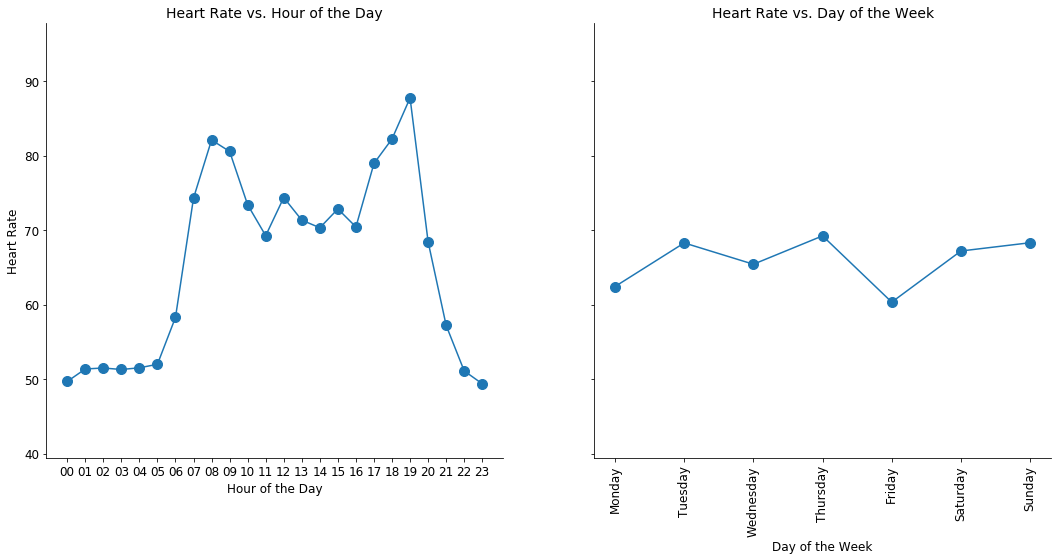

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,8))

ax1.plot(meanHR, linestyle='-', marker='o', markersize=10)

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.set_ylim([np.min(meanHR)-10, np.max(meanHR)+10])
ax1.tick_params(labelsize=12)

ax1.set_title('Heart Rate vs. Hour of the Day', fontsize=14)
ax1.set(xlabel=meanHR.index.name) 
ax1.set_xlabel('Hour of the Day', fontsize=12) 
ax1.set_ylabel('Heart Rate', fontsize=12)



ax2.plot(meanDOW_np, linestyle='-', marker='o', markersize=10)

ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.set_ylim([np.min(meanHR)-10, np.max(meanHR)+10])
ax2.tick_params(labelsize=12)

ax2.set_title('Heart Rate vs. Day of the Week', fontsize=14)

ax2.set_xticks(range(0,7,1))
ax2.set_xticklabels(DOW_df.index, rotation=90) 
ax2.set_xlabel('Day of the Week', fontsize=12)

In [15]:
df['hr_int'] = df['hr'].astype(int)
nine5_df = df[(df['hr_int'] >= 9) & (df['hr_int'] <= 17) & (df['DOW'] != 'Saturday') & (df['DOW'] != 'Sunday')] 
night_df = df[(df['hr_int'] <= 8) | (df['hr_int'] >= 22)]
freetime_df = df[~((df['hr_int'] >= 9) & (df['hr_int'] <= 17) & (df['DOW'] != 'Saturday') & (df['DOW'] != 'Sunday') | ((df['hr_int'] <= 8) | (df['hr_int'] >= 22)))]

In [16]:
print('HR 9 to 5 weekdays: '+str(round(nine5_df['Heart Rate'].mean(),2)))
print('HR night time: '+str(round(night_df['Heart Rate'].mean(),2)))
print('HR free time: '+str(round(freetime_df['Heart Rate'].mean(),2)))

HR 9 to 5 weekdays: 71.61
HR night time: 56.94
HR free time: 75.74


/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Day of the Week')

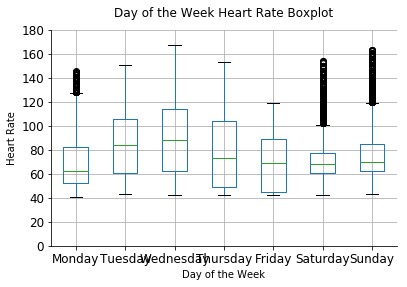

In [17]:
plt.figure(figsize = (16,8))
freetime_df.boxplot(column = 'Heart Rate', by = 'DOW')

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_ylim([0, 180])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 

plt.title('')
plt.suptitle('Day of the Week Heart Rate Boxplot')
plt.ylabel('Heart Rate')
plt.xlabel('Day of the Week')